# PART 1

# This notebook contains following contents:

## 01. Import Libraries and Data
## 02. Any security implications of new data & address any PII data.
## 03. Regional Segmentation
### 3.1. Setup the regional column
### 3.2. Spending habits between Regions.
## 04. Exclusion flag
## 05. A Profiling variable & Aggregation and Frequeny
### 5.1 Age
### 5.2 Income
### 5.3 No. of Dependents
## 08. Compare your customer profiles with regions and departments.


## 01. Import Libraries and Data

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Turn the data folder into string 
path = r'/Users/amritkaur/Desktop/CF Data Immersion/Chapter 4/Achievement 4'

In [7]:
# Import most recent data set from Prepared Data folder and store in instacart_project
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [8]:
# Display the maximum number of columns
pd.set_option('display.max_columns', None)

In [9]:
instacart.head(50)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,4.4,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

While individual columns like age, gender, state, etc., might not directly identify a person, when combined, they could lead to re-identification if there is external data available. Dropping first_name and last_name columns are very straightforward and one of the most effective ways to avoid re-identification. However, even after the removal of name-related fields, the rest of the column combination, such as age, gender, marital status, state, and income, might potentially be used to identify somebody in a small population or region. 

In [12]:
# Dropping first_name, last_name and _merge(unnecessary) columns
instacart = instacart.drop(columns=['first_name','last_name','_merge'])

In [13]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 03.  Create a regional segmentation of the data that create a “Region” column based on the “State” column from your customers data set.

### 3.1. Setup the regional column.

In [16]:
# # Assign Northeast,Midwest , South, West Region
result = []
for value in instacart['state']:
    if value in ('Maine' 'New Hampshire' 'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	
                 'Pennsylvania'	'New Jersey') :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	
                   'Minnesota'	'Iowa'	'Missouri') :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	
                   'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana') :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	
                   'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii') :
        result.append('West')
    else :
        result.append('Not a region')

In [17]:
#Assigning the values in result[] to new column Region
instacart['region']=result

In [18]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


### 3.2. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [20]:
# Creating a Crosstab Region to spending flag
crosstab = pd.crosstab(instacart['region'], instacart['spending_flag'], dropna = False)

In [21]:
crosstab.to_clipboard()

In [22]:
# print the crosstab
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


In [23]:
# Export the most updated data to my device
instacart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_updated.pkl'))

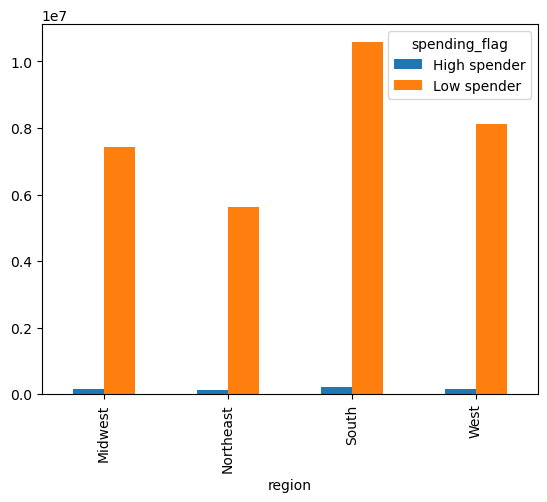

In [24]:
#Visualize the crosstab's output in form of bar chart. 
bar_loyality =  crosstab.plot.bar()

In [25]:
#Exporting bar chart
bar_loyality.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10','bar_loyality.png'))

## 04. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [27]:
# Create a flag for customers with less than 5 orders
instacart.loc[instacart['max_order'] < 5, 'exclusion_flag'] = 'Exclude'
instacart.loc[instacart['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [28]:
instacart.head(50)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
5,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,4.4,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep


In [29]:
instacart['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [30]:
# Check the whole dataframe shape
instacart.shape

(32404859, 32)

In [31]:
#Creating subset (Excluding rows that have max order less than 5)
instacart = instacart[instacart['exclusion_flag'] == 'Keep']

In [32]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep


In [33]:
#Removing unnecessary columns
instacart= instacart.drop(columns = 'exclusion_flag')

In [34]:
# Check the dataframe after removing unncessary column 'exclusion_flag'.
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [35]:
#Exporting the updated Data to Data folder
instacart.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'exclusion_instacart.pkl'))

## 05 & 06 & 07. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. Create an appropriate visualization to show the distribution of profiles. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### 5.1. Age

#### Age Young adult =< 25
#### Adult 25-40
#### Older Adult 40-65
#### Senior 65+

In [39]:
#Creating age profiling variable
instacart.loc[instacart['age'] <= 25 ,'age_group'] = 'Young Adult'
instacart.loc[(instacart['age'] > 25) & (instacart['age'] <= 40) ,'age_group'] = 'Adult'
instacart.loc[(instacart['age'] > 40) & (instacart['age'] <= 65) ,'age_group'] = 'Older Adult'
instacart.loc[instacart['age'] > 65 ,'age_group'] = 'Senior'

In [40]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult


In [41]:
instacart['age_group'].value_counts()

age_group
Older Adult    12085297
Senior          7730834
Adult           7283915
Young Adult     3864518
Name: count, dtype: int64

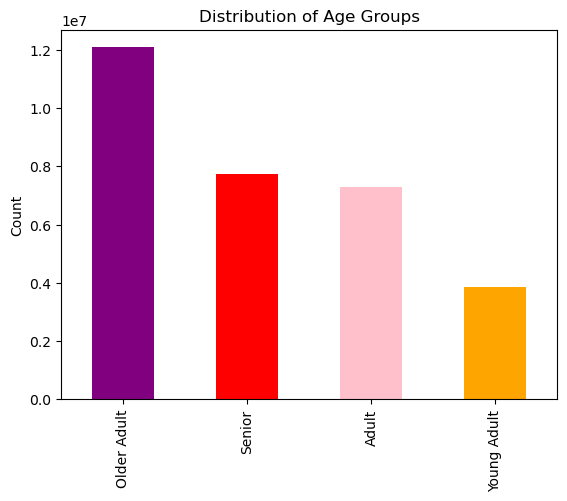

In [42]:
# Visualize the output based on age
age_group_counts = instacart['age_group'].value_counts(dropna=False)
age_group_distribution_bar = age_group_counts.plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green','blue'])  
plt.title('Distribution of Age Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [43]:
# Export the bar chart
age_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'age_distribution_bar.png'))

In [44]:
#Aggregate for age group usage frequency
instacart.groupby('age_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                             mean  min   max
age_group                                   
Adult                   10.820694  0.0  30.0
Older Adult             10.817067  0.0  30.0
Senior                  10.795536  0.0  30.0
Young Adult             10.799071  0.0  30.0

In [45]:
#Aggregate for age group usage frequency
instacart.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.785918  1.0  25.0
Older Adult  7.792829  1.0  25.0
Senior       7.794342  1.0  25.0
Young Adult  7.784889  1.0  25.0

### 5.2. Income

#### Low Income group
#### Middle Income group
#### High Income groups

In [48]:
#Creating income profiling variable
instacart.loc[instacart['income'] <= 50000 ,'income_group'] = 'Low Income' 
instacart.loc[(instacart['income'] > 50000) & (instacart['age'] <= 100000) ,'income_group'] = 'Middle Income'
instacart.loc[instacart['income'] > 100000 ,'income_group'] = 'High Income'

In [49]:
instacart['income_group'].value_counts(dropna = False)

income_group
High Income      14207028
Middle Income    13394982
Low Income        3362554
Name: count, dtype: int64

In [50]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income


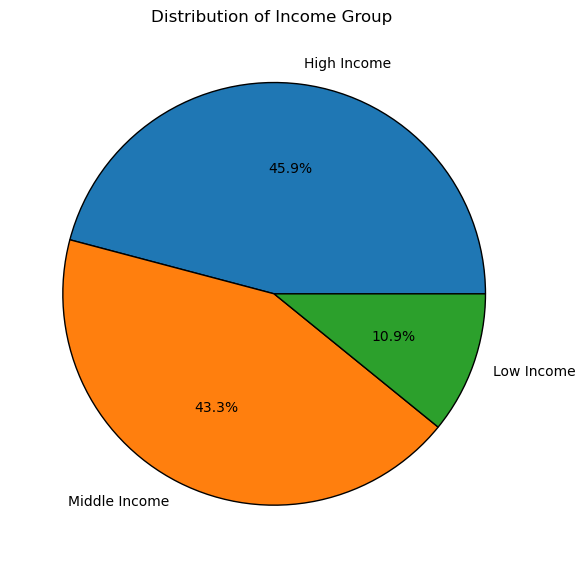

In [51]:
# Visualize the result based on income
pie_income_group_counts = instacart['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=pie_income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Distribution of Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [52]:
# Export Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', 'income_group_pie_chart.png'))

In [53]:
#Aggregate for income group usage frequency
instacart.groupby('income_group').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']}) 

days_since_last_order               prices           
                               mean  min   max      mean  min   max
income_group                                                       
High Income               10.769663  0.0  30.0  7.953438  1.0  25.0
Low Income                11.175808  0.0  30.0  6.707347  1.0  25.0
Middle Income             10.762110  0.0  30.0  7.889856  1.0  25.0

### 5.3. Number of Dependents

In [55]:
# Creating a dependents flag
instacart.loc[instacart['n_dependants'] > 0 ,'dependents_flag'] = 'Has Dependents'
instacart.loc[instacart['n_dependants'] == 0 ,'dependents_flag'] = 'No Dependents'

In [56]:
instacart['dependents_flag'].value_counts(dropna = False)

dependents_flag
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

In [57]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,Busiest Day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group,income_group,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents


Text(0.5, 0, '')

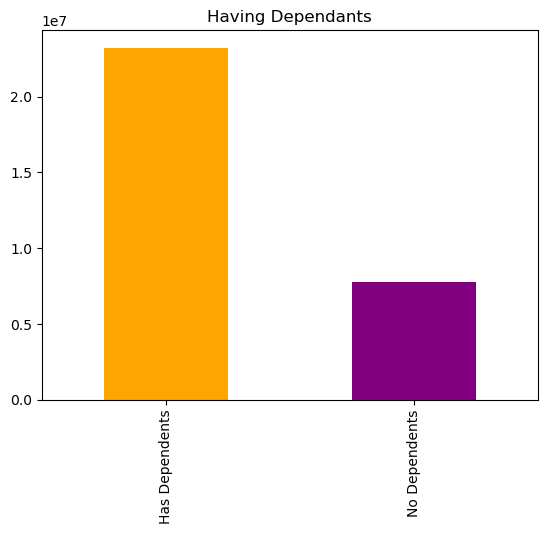

In [58]:
# Creating Dependents Visualization Bar Chart
dependents_flag_bar_chart=instacart['dependents_flag'].value_counts().plot.bar(color = ['Orange','purple'])
plt.title('Having Dependants')
plt.xlabel('')

In [59]:
# Export Bar Chart
dependents_flag_bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', 'dependents_flag_bar_chart.png'))

In [60]:
#Aggregate for dependent group usage frequency
instacart.groupby('dependents_flag').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']}) 

days_since_last_order               prices           
                                 mean  min   max      mean  min   max
dependents_flag                                                      
Has Dependents              10.816416  0.0  30.0  7.790937  1.0  25.0
No Dependents               10.791951  0.0  30.0  7.789550  1.0  25.0

In [61]:
# Export New Dataframe
instacart.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'New_instacart.pkl'))

## 08. Compare your customer profiles with regions and departments.

In [63]:
# Importing department dataframe
dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [64]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
# Renaming index column as department_id
dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [66]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [67]:
instacart.shape

(30964564, 34)

# NOTE: While merging the instacart and department data, I was having issue and my notebook was keeping restarting. To resolve this issue, I prefer to create an another notebook to perform further operations. Please refer to PART 1a and PART 1b. 